## Tensorflow and Keras

### Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

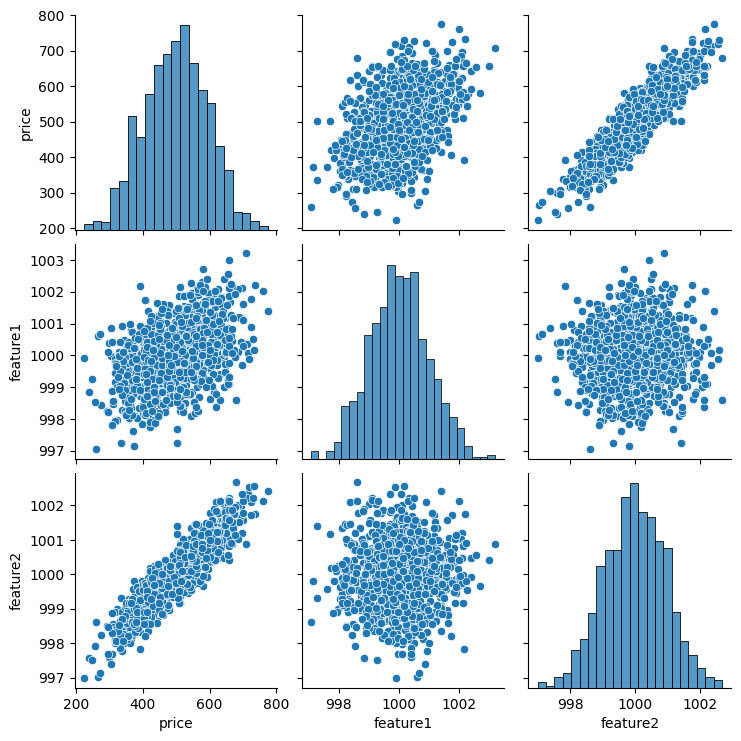

In [5]:
sns.pairplot(df)

### Test/Train Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalizing/Scaling the Data


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating a Model

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [18]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [76]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [22]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [30]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4933
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0218
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5811
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1647
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3953
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7272
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 24.3399
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0595
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6337
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 24.0843
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7253
Epoch 12/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1375
Epoch 13/250
22/22 [=====

22/22 [==============================] - 0s 2ms/step - loss: 24.3626
Epoch 102/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2624
Epoch 103/250
22/22 [==============================] - 0s 2ms/step - loss: 24.9937
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1487
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 24.6881
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4706
Epoch 107/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5002
Epoch 108/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3234
Epoch 109/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7545
Epoch 110/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2303
Epoch 111/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4094
Epoch 112/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4357
Epoch 113/250
22/2

22/22 [==============================] - 0s 2ms/step - loss: 24.3439
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5638
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 24.2218
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1878
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 24.7209
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.1297
Epoch 205/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5019
Epoch 206/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1794
Epoch 207/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5826
Epoch 208/250
22/22 [==============================] - 0s 2ms/step - loss: 24.4114
Epoch 209/250
22/22 [==============================] - 0s 2ms/step - loss: 24.5068
Epoch 210/250
22/22 [==============================] - 0s 2ms/step - loss: 24.1889
Epoch 211/250
22/2

## Evaluation


In [26]:
model.history.history

{'loss': [256539.125,
  256394.3125,
  256251.015625,
  256092.1875,
  255884.40625,
  255632.1875,
  255349.171875,
  255024.4375,
  254650.90625,
  254223.765625,
  253738.96875,
  253191.8125,
  252575.515625,
  251885.28125,
  251117.546875,
  250267.59375,
  249323.859375,
  248288.53125,
  247148.921875,
  245901.9375,
  244537.765625,
  243053.734375,
  241445.4375,
  239704.84375,
  237820.796875,
  235795.640625,
  233623.640625,
  231294.28125,
  228805.6875,
  226140.78125,
  223307.15625,
  220296.015625,
  217109.484375,
  213729.984375,
  210147.90625,
  206389.8125,
  202443.9375,
  198272.1875,
  193905.4375,
  189342.984375,
  184580.109375,
  179607.953125,
  174459.8125,
  169104.15625,
  163531.890625,
  157774.921875,
  151872.609375,
  145779.71875,
  139518.578125,
  133085.21875,
  126570.7421875,
  119873.0546875,
  113082.890625,
  106221.7734375,
  99325.9921875,
  92334.328125,
  85318.2890625,
  78294.5390625,
  71350.2265625,
  64496.22265625,
  57703.1328

In [22]:
loss = model.history.history['loss']

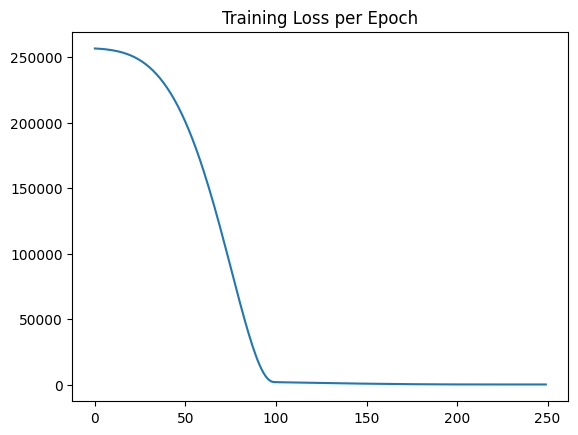

In [23]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch")

Text(0.5, 1.0, 'Training Loss per Epoch')

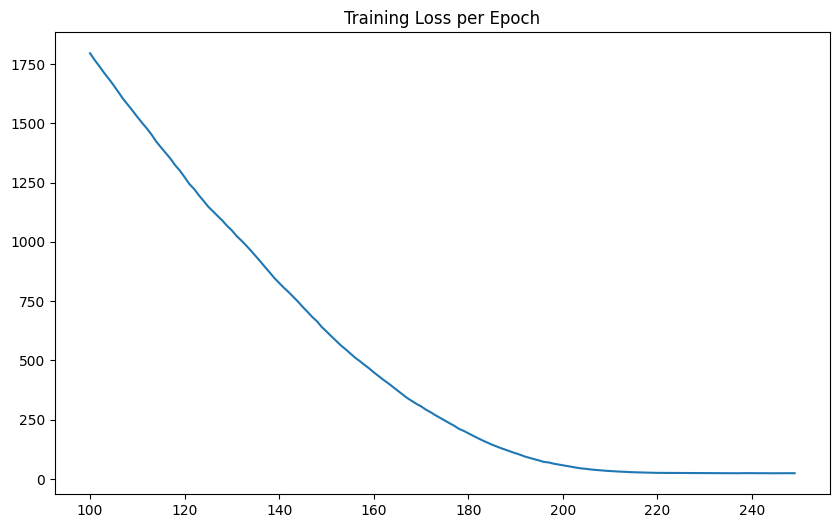

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(100,250),y=loss[100:])
plt.title("Training Loss per Epoch")

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [44]:
model.metrics_names

['loss']

In [45]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [46]:
training_score

23.743074417114258

In [47]:
test_score

25.279802322387695

### Further Evaluations

In [48]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [49]:
test_predictions

array([[405.61624],
       [624.1238 ],
       [592.6715 ],
       [572.7666 ],
       [366.92972],
       [579.716  ],
       [515.5401 ],
       [459.48514],
       [549.75793],
       [447.88107],
       [612.35535],
       [549.41   ],
       [419.44525],
       [409.20816],
       [651.8252 ],
       [437.65466],
       [508.87408],
       [660.5864 ],
       [663.2257 ],
       [566.0405 ],
       [334.48694],
       [445.2092 ],
       [382.83844],
       [379.04892],
       [567.11456],
       [611.17816],
       [532.8724 ],
       [428.21057],
       [656.08545],
       [414.40598],
       [442.99466],
       [485.54886],
       [438.77783],
       [682.5163 ],
       [425.08658],
       [418.04126],
       [502.3339 ],
       [550.97095],
       [510.20853],
       [395.70285],
       [619.16284],
       [416.95917],
       [605.0055 ],
       [446.312  ],
       [502.43076],
       [582.216  ],
       [669.6134 ],
       [490.81766],
       [318.7888 ],
       [485.85187],


In [50]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [51]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [52]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [53]:
test_predictions

0      405.616241
1      624.123779
2      592.671509
3      572.766602
4      366.929718
          ...    
295    529.531982
296    515.840576
297    610.215698
298    417.280121
299    411.221283
Length: 300, dtype: float32

In [54]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [55]:
pred_df.columns = ['Test Y','Model Predictions']

In [56]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.616241
1,624.156198,624.123779
2,582.455066,592.671509
3,578.588606,572.766602
4,371.224104,366.929718
...,...,...
295,525.704657,529.531982
296,502.909473,515.840576
297,612.727910,610.215698
298,417.569725,417.280121


<AxesSubplot: xlabel='Model Predictions', ylabel='Test Y'>

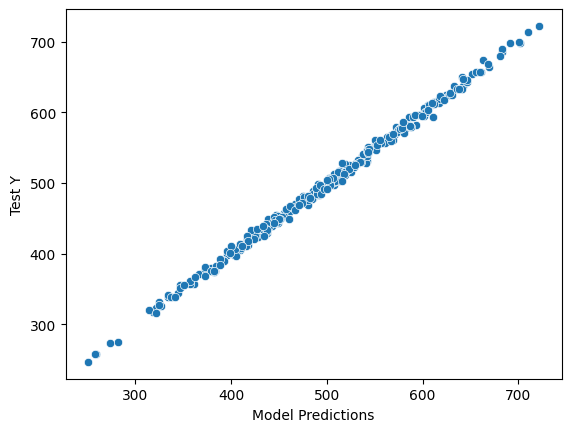

In [57]:
sns.scatterplot(x='Model Predictions',y='Test Y',data=pred_df)

In [58]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\ParsArgham\AppData\Local\Temp\ipykernel_2704\1356567216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<AxesSubplot: xlabel='Error', ylabel='Density'>

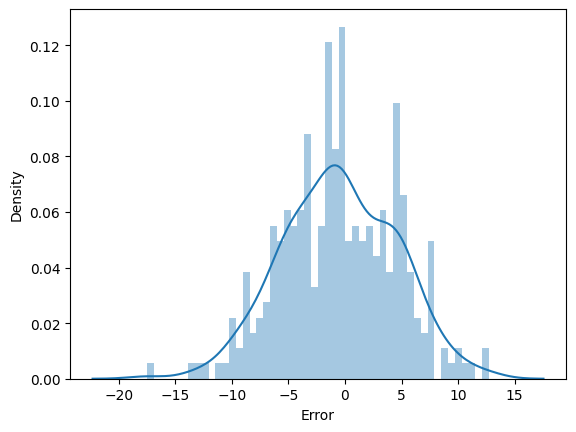

In [60]:
sns.distplot(pred_df['Error'],bins=50)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.039856928937786

In [63]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.279803425498883

In [65]:
#RMSE
test_score**0.5

5.027902377969136

In [66]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [67]:
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [68]:
new_gem = scaler.transform(new_gem)

In [70]:
model.predict(new_gem)

1/1 [==============================] - 0s 32ms/step


array([[420.06015]], dtype=float32)

## Saving and Loading a Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save('my_model.h5')

In [73]:
later_model = load_model('my_model.h5')

In [74]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 93ms/step


array([[420.06015]], dtype=float32)